![header](../figures/logos_partenaires._cmems_se.jpg)

# Evaluating baseline for SWOT error calibration

<div style="text-align: right"><i> 2022-08-24 DEMO_EVAL_BASELINE </i></div>

***
**Authors:**  Datlas, IGE, IMT-Atlantique & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMT-Atlantique & CLS <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Baseline evaluation</center></h1></div>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***


<div class="alert alert-danger" role="alert">

<h3>Learning outcomes</h3>

At the end of this notebook you will know:
<ul>
  <li>How you can display unfiltered, filtered SWOT Level3 SSH products.</li>
  <li>How you can evaluate the median filter: statistical and spectral analysis.</li>
</ul>
    
</div>



In [1]:
import os
import glob
import sys
sys.path.append('..')
from src.benchmark import *
from src.plot import *
from src.swot import *

<div class="alert alert-info" role="alert">

<h2>1. Input files to analyse</h2>

</div>

## Data challenge inputs

In [2]:
# Check if inputs have already been downloaded otherwise do
if len(os.listdir('../inputs'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_inputs.tar.gz
    !tar -xvf dc_SWOTcalibGS_inputs.tar.gz dc_SWOTcalibGS_inputs    
    !mv dc_SWOTcalibGS_inputs  ../inputs/    
    !rm dc_SWOTcalibGS_inputs.tar.gz
     

In [3]:
 list_of_file_inputs = sorted(glob.glob('../inputs/dc_SWOTcalib_glorys_inputs/dc*')) 

## Filtered outputs to evaluate

In [4]:
list_of_file = sorted(glob.glob('../results/demo_baseline_glorys/dc*'))

<div class="alert alert-info" role="alert">

<h2>2. Illustration on one pass (same as quickstart example)</h2>

</div>

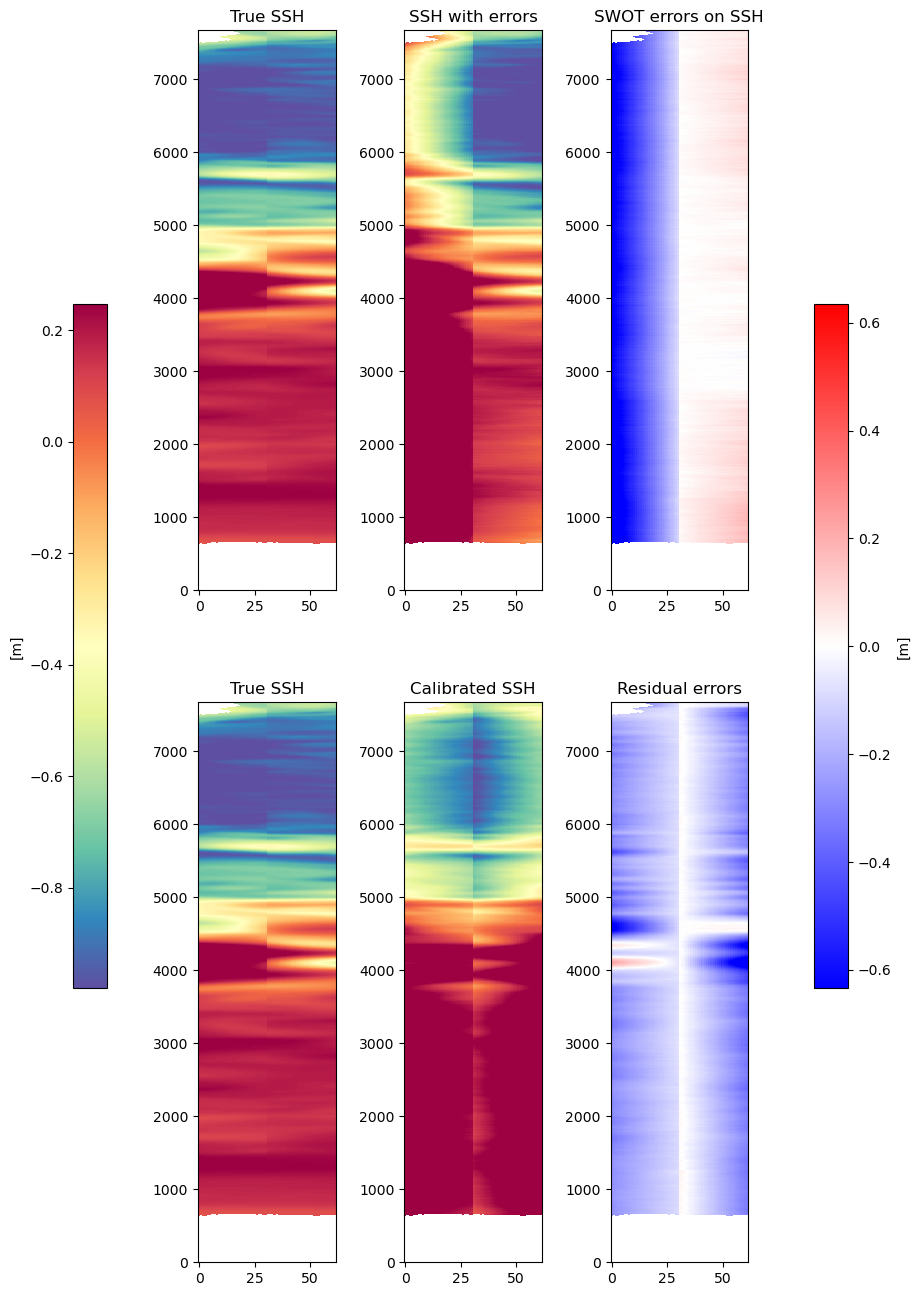

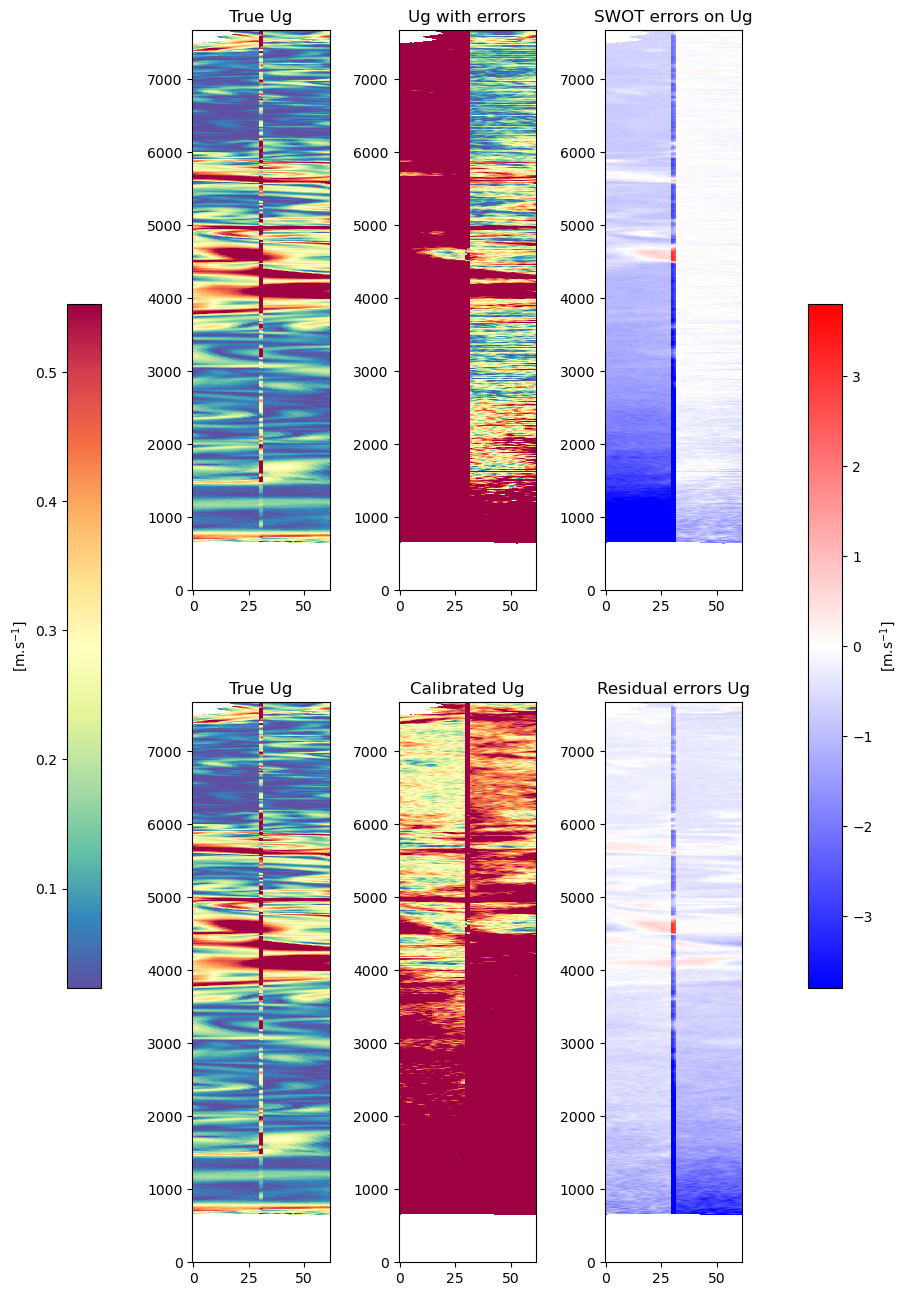

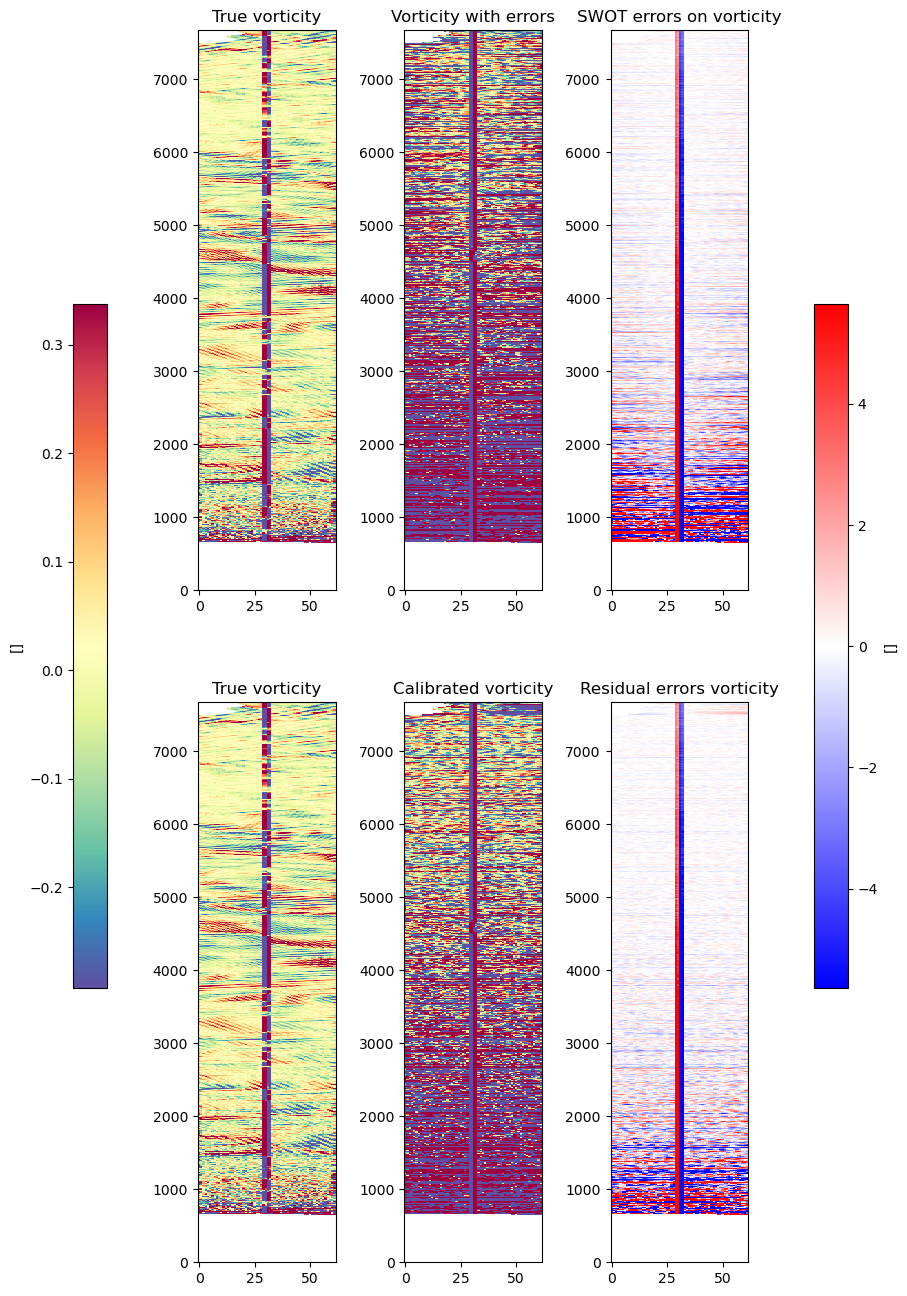

In [5]:
plot_demo_pass(list_of_file[3], list_of_file[3])

<div class="alert alert-info" role="alert">

<h2>3. Statistical & Spectral Analysis </h2>

</div>

## 3.1 Parameters

In [6]:
etuvar = 'ssh_err_calib'
calib_name = 'BASELINE' 
output_dir = '../results/demo_baseline_glorys'
stat_output_filename = f'{output_dir}/stat_'+calib_name+'.nc'
stat_by_regime_output_filename = f'{output_dir}/stat_by_regime_'+calib_name+'.nc'
psd_output_filename = f'{output_dir}/psd_'+calib_name+'.nc'
baseline_bench = Benchmark()

## 3.2 Compute grid boxes statistics

SSH: <xarray.DataArray 'ssh_rmse' ()>
array(0.36252327)
Ug: <xarray.DataArray 'ug_rmse' ()>
array(11.33220006)
Ksi: <xarray.DataArray 'ksi_rmse' ()>
array(46308.67075554)


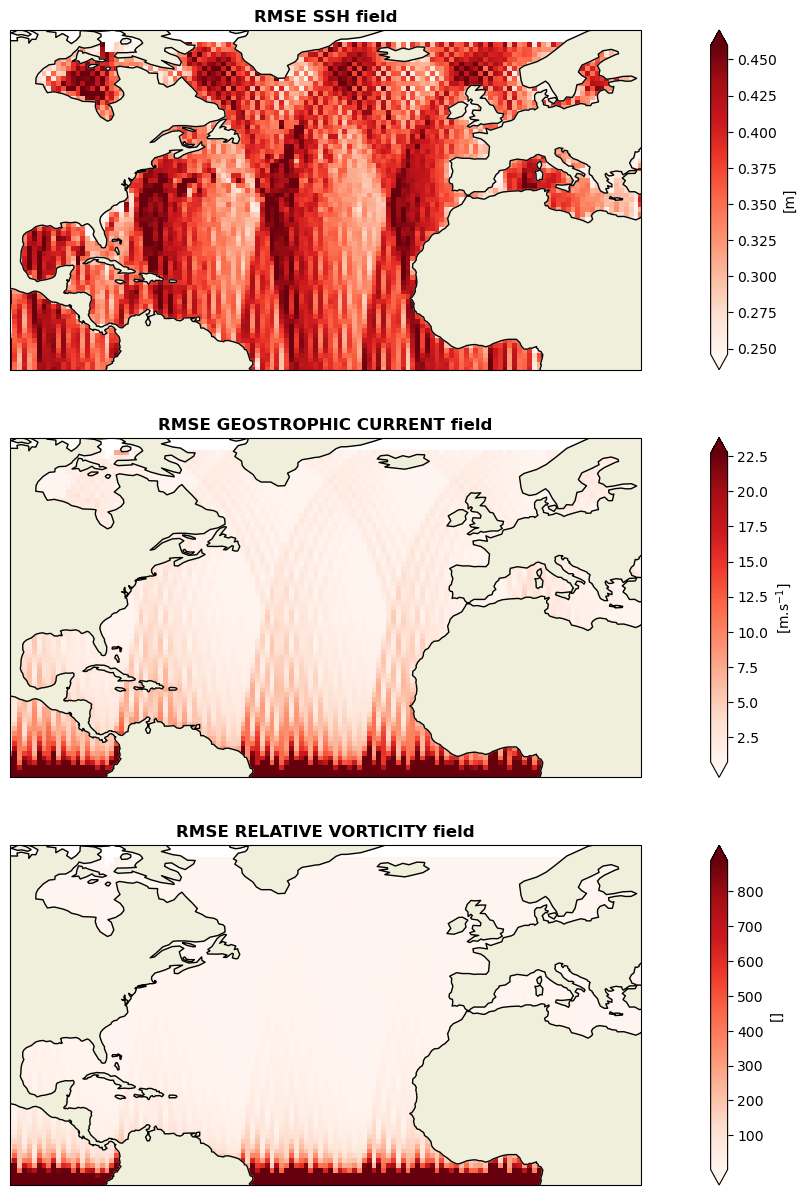

CPU times: user 1min 26s, sys: 3.41 s, total: 1min 30s
Wall time: 1min 49s


In [7]:
%%time
# Compute gridded stats
baseline_bench.compute_stats(list_of_file, etuvar, list_of_file)

# Write gridded stats 
baseline_bench.write_stats(stat_output_filename, calib=calib_name)

# Plot gridded stats
baseline_bench.display_stats(stat_output_filename, xlim=(-100, 30), ylim=(0, 70))

## 3.4 Compute Spectral scores

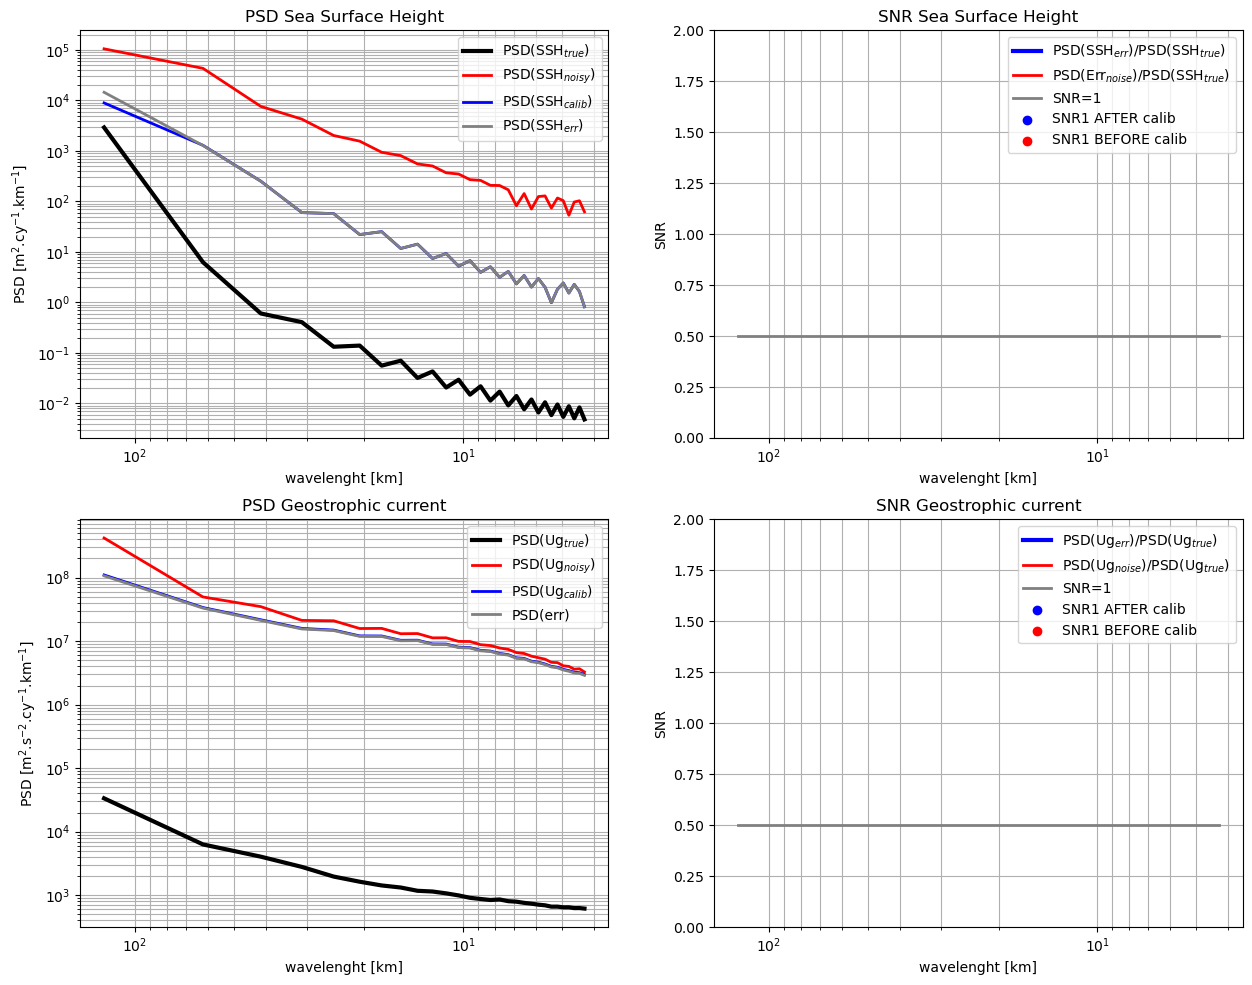

CPU times: user 1min 13s, sys: 12.8 s, total: 1min 26s
Wall time: 1min 1s


In [8]:
%%time
# Compute PSD scores
baseline_bench.compute_along_track_psd(list_of_file, etuvar,list_of_file, lengh_scale=400,overlay=0,psd_type='powerspec',vars2diag=[True,True,False])

# Write PSD scores
baseline_bench.write_along_track_psd(psd_output_filename, calib=calib_name,psd_type='powerspec',vars2diag=[True,True,False])

# Plot PSD scores
baseline_bench.display_psd(psd_output_filename,vars2diag=[True,True,False])

<div class="alert alert-info" role="alert">

<h2>4. Leaderboard </h2>

</div>

In [9]:
baseline_bench.summary('demo_generate_baseline.ipynb')

ValueError: setting an array element with a sequence.